# ENSE 471 - Winter 2018 - Assignment 2
## Adam Tilson


## Digital Art Application - Phase 2

The purpose of this assignment is to extend the work done in the first lab on the digital art application. So far we have gained the ability to draw on the canvas using straight or freehand lines. In this lab we will add functionality to allow the following:
- using more drawing tools, including rectangles and ellipses
- Changing the brush width continuously with a preview
- using a greater number of colors using the Color Picker widget, 
- implementing an undo feature,
- implementing additional brushes
- Save and load images from the canvas.

An image of the updated interface is shown below:

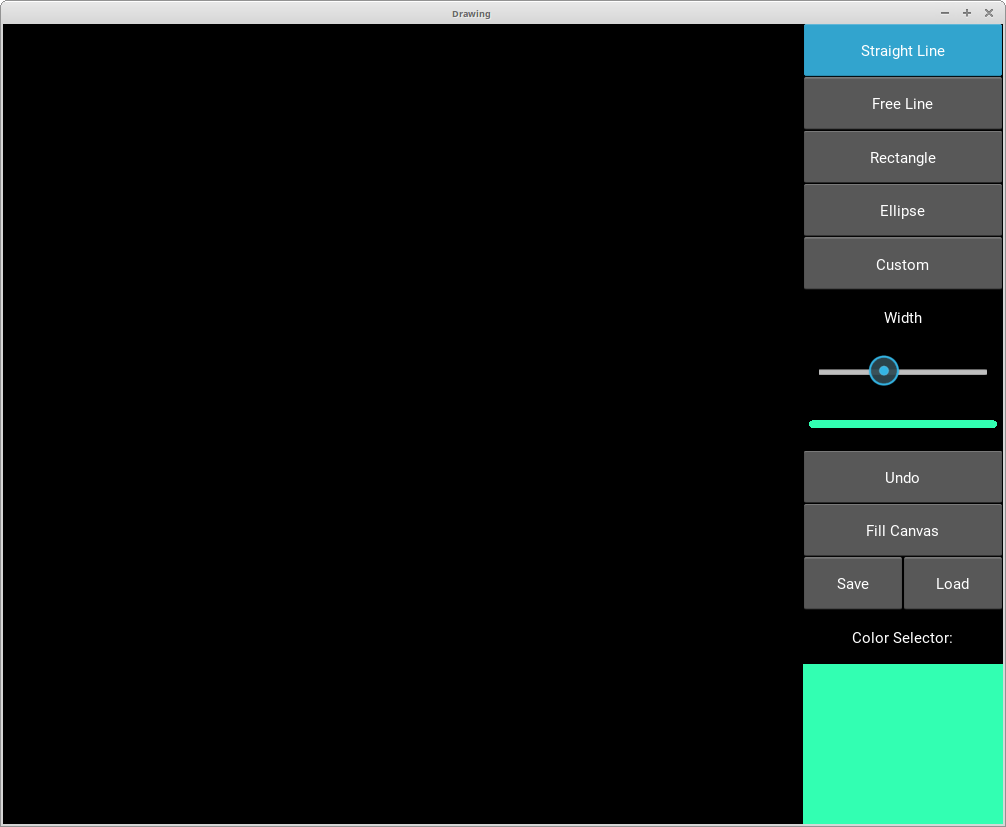

As in Assignment 1, a brief video is shown below to aid in understanding the interface:

In [ ]:
# run me!
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ExqkgZ3d1YY" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

Suggested approach: Create the .kv code which will implement the interface. This is mostly comprised of Kivy Widgets, but you will need to use draw commands for the Demo line and the color selector previews. You may wish to make custom widgets for the Painting Area and the Menu Area, as was done in the lab. It may also be convenient to copy in your Lab 3 code and work from there.

Then follow through the following sections to get suggestions on implementing the various tools:

# Part 1: Updated Tools

This section discusses the tools shown in this part of the interface:

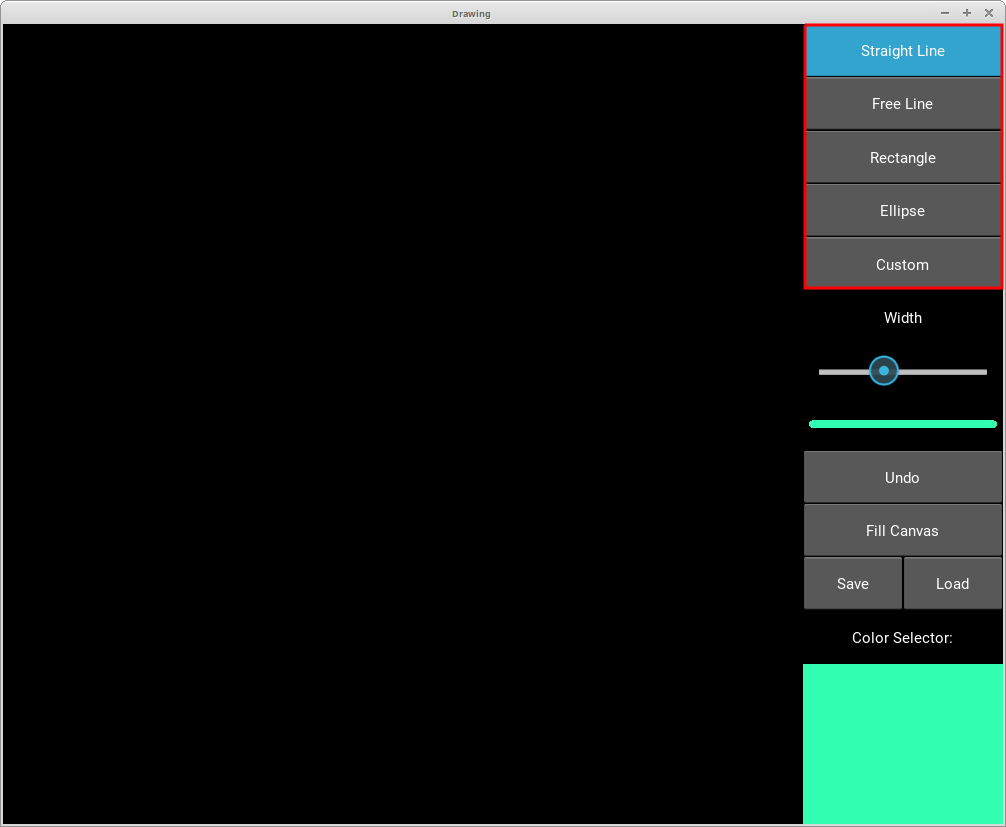


## 1.1: The Straight Line 

The straight line tool is mostly derived from the lab. However, we fix the bug of not being able to see the line as well:

If you recall in the lab when drawing lines there was no preview of the line, it's only upon release that it was displayed. This is a usibility error which can be rectified somewhat easily. In the code block below, copy and paste in your code from the Lab Part 6 and observe the bug:

Recall: Once you run any Kivy application, you will need to restart the kernel before another Kivy window will spawn. You can save time using the keyboard shortcut for this which is, in order:  Esc, 0, 0


The following a proposed solution to fix the bug, which assumes that you followed the comments in Lab 3. Rename your on_touch_up function to on_touch_move. If you run your code here you will see infinte lines drawn every time you move your mouse. This isn't what we want. What we instead want to do is check if we have already drawn the line, and if so modify it's end point.

Implement the following pseudo code for the on_touch_move function to accomplish this: 

```
# save the position of the end touch to the variable touch_end
# check if the key 'line' exists in the touch user dictionary
# if not,
    # using these two variables, draw a line with a random color for the first
    # time using the touch_start and touch_end points
# else
    # modify the points of the line so that the touch_start and the new touch_end are utilized.
```

You can check if a key does not exist in a dictionary using the following syntax:

```
if KEY not in DICTIONARY:
```
Once you have this code working, your line should now preview and draw permenantly when released as expected.

## 1.2 Free Draw Line

No significant changes need to be made for the free draw line in this assignment, besides renaming the button from "Curved Line" to "Free Draw"

## 1.3 Rectangle:

The primary difficulty in drawing Rectangles and Ellipses is that the interfaces for drawing them are different than for drawing lines. Lines require a series of points, while rectangles and ellipses require position (pos), which is the point in the lower left corner of the rectangle, and size, which is the width and height of the rectangle.

The following figure demonstrates the difference:

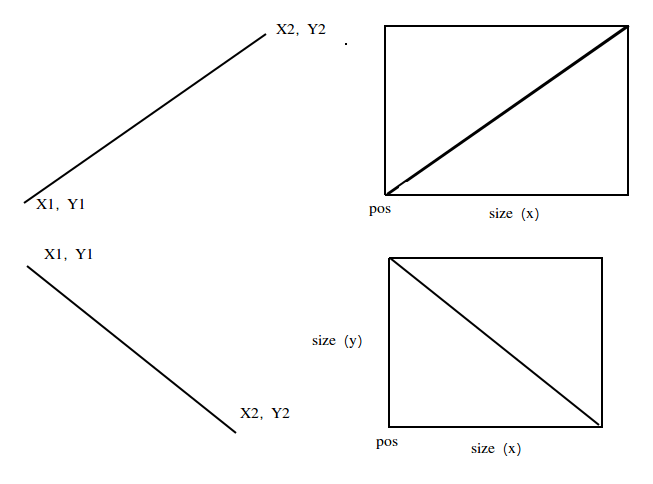

To implement drawing rectangles and ellipses, begin by copying and pasting the previous code cell where you drew a line into the cell below:

You can reuse much of this code if you create a function which takes a line's two endpoints, and returns the points required for the rectangle constructor, that is, the position (pos) and size, and then pass these into the Rectangle constructor.

The process to do this is as follows: 
- imagine a rectangle which circumscribes the line,
- find the point at the lower left and return it as the pos
- find the upper right point of the rectangle, subtract the lower left point, and return this as the size. 

This process is trivial if one point is in the lower left and the other point is in the upper right. In this case, the size point is just the lower left point, and the size is just the upper right point minus the lower left point. It gets more tricky if the line is diagonal in the other direction. At most there are four cases which need to be handled, but you can get away with less code with enough thought. As a hint, consider using the min function. Once you have a function successfully returning these values, modify the code to draw rectangles instead of lines.

## 1.4 Ellipse

This should be trivial to implement if you succsessfully got the Rectangle working, as it shares the same interface.

## 1.5 Custom Brush

For this part of the assignment, you are to implement a custom brush which works similar to "free draw", but draws a more complex line. You may implement any brush you would like as the custom brush. Some suggestions which look interesting include:
- instead of using the exact position of the brush, add a random x or y offset. This creates a "shakey" line
- create reflection vertically, horizontally or diagonally
- use multiple lines oriented in a + or * shape.
- add a bunch of randomly placed dots to simulate an airbrush

An easy way to get this working is to work off the free draw demo from Lab 3, and modify the lines drawn on press. You can experiment with this in the cell below:

In [ ]:
from random import random
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.button import Button
from kivy.graphics import Color, Ellipse, Line

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')


class MyPaintWidget(Widget):

    def on_touch_down(self, touch):
        color = (random(), 1, 1)
        with self.canvas:
            Color(*color, mode='hsv')
            touch.ud['line'] = Line(points=(touch.x, touch.y), width=2.0)
            # Try modigying this draw instruction or adding extra lines

    def on_touch_move(self, touch):
        touch.ud['line'].points += [touch.x, touch.y]
        # Try modigying this draw instruction or adding extra lines

class MyPaintApp(App):

    def build(self):
        parent = Widget()
        self.painter = MyPaintWidget()
        clearbtn = Button(text='Clear')
        clearbtn.bind(on_release=self.clear_canvas)
        parent.add_widget(self.painter)
        parent.add_widget(clearbtn)
        return parent

    def clear_canvas(self, obj):
        self.painter.canvas.clear()


if __name__ == '__main__':
    MyPaintApp().run()

Now that you have the different drawing tools working, we will move on to configuration widgets:

# Part 2: Width Slider and Preview

This section gives tips for implementing the width slider and preview:

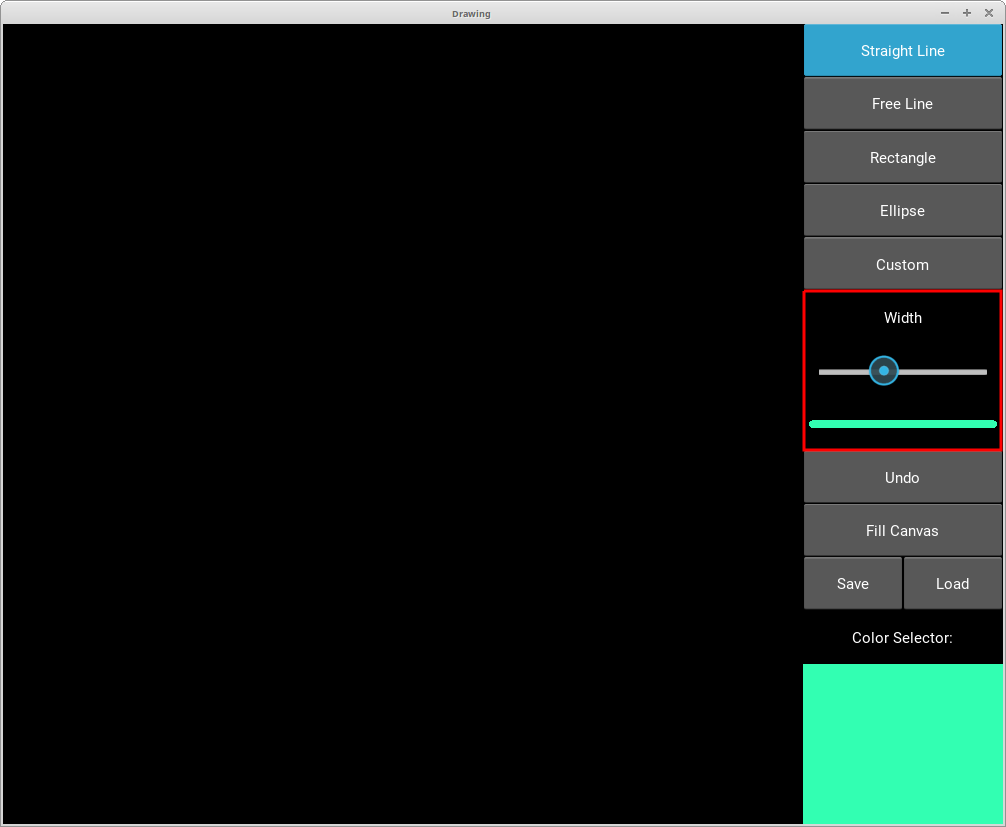

## 2.1 Slider Widget

This widget should be simple to implement. Set the minimum value to 0.1 and the Maximum value to 10. Use the on_value function to update the demo Line as well as the variables for the drawing line. It may be advisable to add an on_property event for this change so that the Observer pattern can be taken advantage of. This would definitely be advisable if there was another method of setting the line width, but in this assignment there is not.

## 2.2 Demonstration Line

To create this widget create a BoxLayout, and create an empty label inside of it. Use a padding of 10 pixels. This will give some buffer space for the edges of the line to grow when the user increases the width of the demo line. Draw a horizontal line across the middle of the label using the dimensions of the label (size and pos).

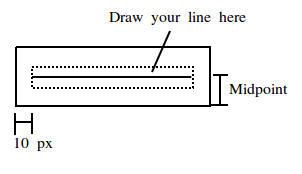

Whenever you update the width or the color, redraw this line. Using properties and on_property events may make this easier.


#  Part 3: Undo, Fill Canvas, Save and Load

This portion of the workbook addresses the buttons in this portion of the interface:

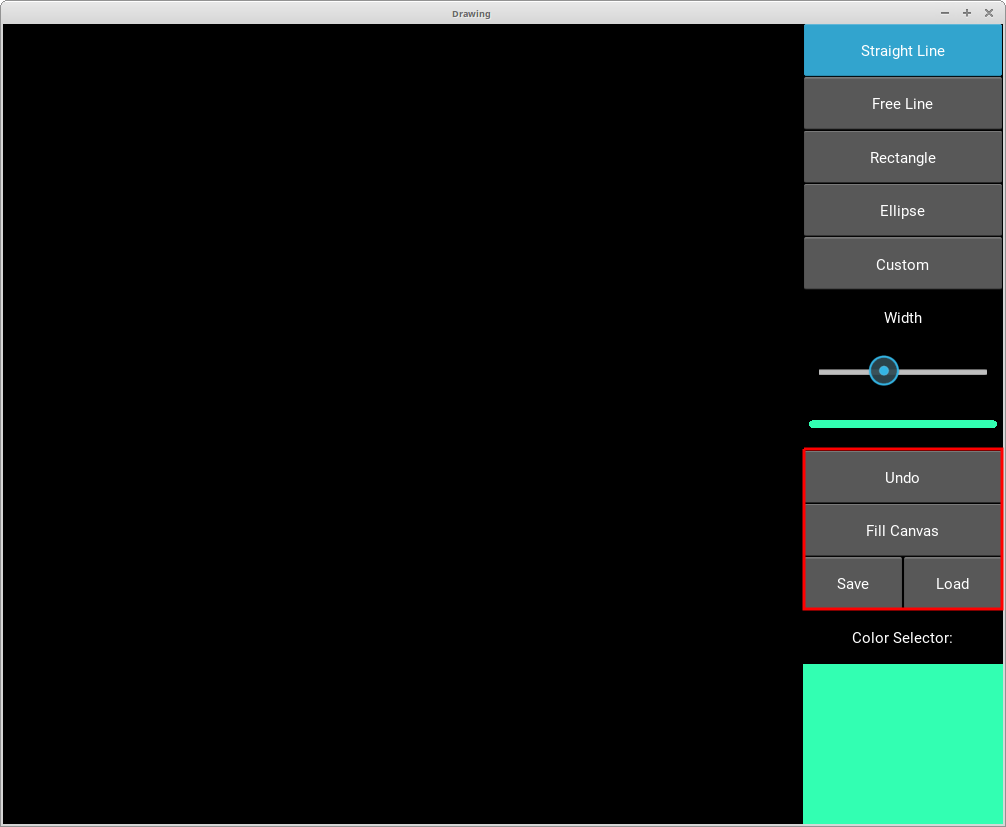

## 3.1 The Undo Button

Recall that the Kivy canvas is represented as a series of draw instruction objects. When a draw command is made, one or more draw commands are stored in the canvas.children list of draw instructions.

This is an incredibly powerful feature of kivy, because it will allows us to accomplish the following:
    - allows power undo, up to unlimited steps
    - allows playing back paintings one stroke at a time
    - allow for saving images in a vector format, for theoretically lossless quality

In the following code block we will attempt to implement the first of these features: A power undo button. This means that every time the undo button is pressed, the last draw element will be removed from the canvas. This may not work completely correctly with your custom brush, but should work for all the others. Begin by running the following code:

In [ ]:
from random import random
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.button import Button
from kivy.graphics import Color, Ellipse, Line

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

class MyPaintWidget(Widget):

    def __init__ (self):
        Widget.__init__(self)
        self.lastInstruction = None
    
    def on_touch_down(self, touch):
        color = (random(), 1, 1)
        with self.canvas:
            Color(*color, mode='hsv')
            touch.ud['line'] = Line(points=(touch.x, touch.y), width=2.0)

    def on_touch_move(self, touch):
        touch.ud['line'].points += [touch.x, touch.y]

    def undo (self, *args):
        print (self.canvas.children)
            
class MyPaintApp(App):

    def build(self):
        parent = Widget()
        self.painter = MyPaintWidget()
        undobtn = Button(text='Undo')
        undobtn.bind (on_release=self.painter.undo)
        parent.add_widget(self.painter)
        parent.add_widget(undobtn)
        return parent

if __name__ == '__main__':
    MyPaintApp().run()

You may remember this as the freehand drawing example from Lab 2, but with the clear option set to be undo. The undo button does not yet have functionality, instead it prints the list of canvas children..

To begin to give it functionality, we must first check to see what is being recorded in the Kivy canvas.children list. Draw a few lines, hit the undo button, and examine what is drawn in the python code output for the block. 

Now, to implement undo all you must do is remove the last element (pop) enough values from this list to erase the line. You can accomplish this using the canvas.remove function. 

Once you feel you know the correct number of remove operations to perform on the list, write the code and test the application. Try to draw a line, and then click the undo button. Does the line get erased? Draw two and try to undo them both. Do they both get erased?

Finally, once the function appears to be working, try to perform an undo when there are no lines on the canvas. Does the application crash? How might you avoid this.

Once this case is protected against, you now have a working undo function.

# 3.2 Clear and Fill Canvas function

The Clear and Fill Canvas function replaces the existing canvas with the color which is currently selected. The easiest way to do this is simply draw a Rectangle of the correct color over the existing canvas. As an added bonus, this will not defeat the "Undo" function we created earlier, so if we accidently clear the canvas we can get it back with a single button. 

# 3.3 Save and Load functions

There is two components to this step: implementing the actual save and load functions, and creating the popups which allow us to decide where they will be saved. The second portion of this is very similar to the proceedure followed in Assignment 1 for the Select File option.

For the first part:

Saving: every widget in kivy has an "export_to_png" function, which writes the canvas to a png image file.

Loading: you can draw a rectangle and texture it with an existing image using the "source" parameter of the Rectangle constructor, which takes the filename of the image to be loaded.

For the second part: 

- Bring in the two copies of the sample load popup code from assignment 1, including the Kivy and Python components
- Rename the classes to make sense with their new functionality
- Modify the save popup to include the filename textbox
- Create the functions to be invoked from the popups which invoke saving and loading procedures 

It is often easier to handle these things individually to ensure they are working. The following two cells contain the "undo" sample code you worked on earlier. Try to implement saving and loading here to ensure that they work. 

In [ ]:
## Use this cell to attempt to implement Saving Features.
# first save to a hardcoded filename using the button
# then modify it to launch the saving popup
from random import random
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.button import Button
from kivy.graphics import Color, Ellipse, Line

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

class MyPaintWidget(Widget):

    def __init__ (self):
        Widget.__init__(self)
        self.lastInstruction = None
    
    def on_touch_down(self, touch):
        color = (random(), 1, 1)
        with self.canvas:
            Color(*color, mode='hsv')
            touch.ud['line'] = Line(points=(touch.x, touch.y), width=2.0)

    def on_touch_move(self, touch):
        touch.ud['line'].points += [touch.x, touch.y]

    def save (self, *args):
        print ("Write your saving code here!")
            
class MyPaintApp(App):

    def build(self):
        parent = Widget()
        self.painter = MyPaintWidget()
        savebtn = Button(text='Save')
        savebtn.bind (on_release=self.painter.save)
        parent.add_widget(self.painter)
        parent.add_widget(savebtn)
        return parent

if __name__ == '__main__':
    MyPaintApp().run()

In [ ]:
## Use this cell to attempt to implement Loading Features.
# first load from a hardcoded filename using the button
# then modify it to launch the saving popup
from random import random
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.button import Button
from kivy.graphics import Color, Ellipse, Line

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

class MyPaintWidget(Widget):

    def __init__ (self):
        Widget.__init__(self)
        self.lastInstruction = None
    
    def on_touch_down(self, touch):
        color = (random(), 1, 1)
        with self.canvas:
            Color(*color, mode='hsv')
            touch.ud['line'] = Line(points=(touch.x, touch.y), width=2.0)

    def on_touch_move(self, touch):
        touch.ud['line'].points += [touch.x, touch.y]

    def load (self, *args):
        print ("Write your loading code here!")
            
class MyPaintApp(App):

    def build(self):
        parent = Widget()
        self.painter = MyPaintWidget()
        loadbtn = Button(text='Load')
        loadbtn.bind (on_release=self.painter.load)
        parent.add_widget(self.painter)
        parent.add_widget(loadbtn)
        return parent

if __name__ == '__main__':
    MyPaintApp().run()

# Part 4: The Color Selector

This section handles the this portion of the interface:

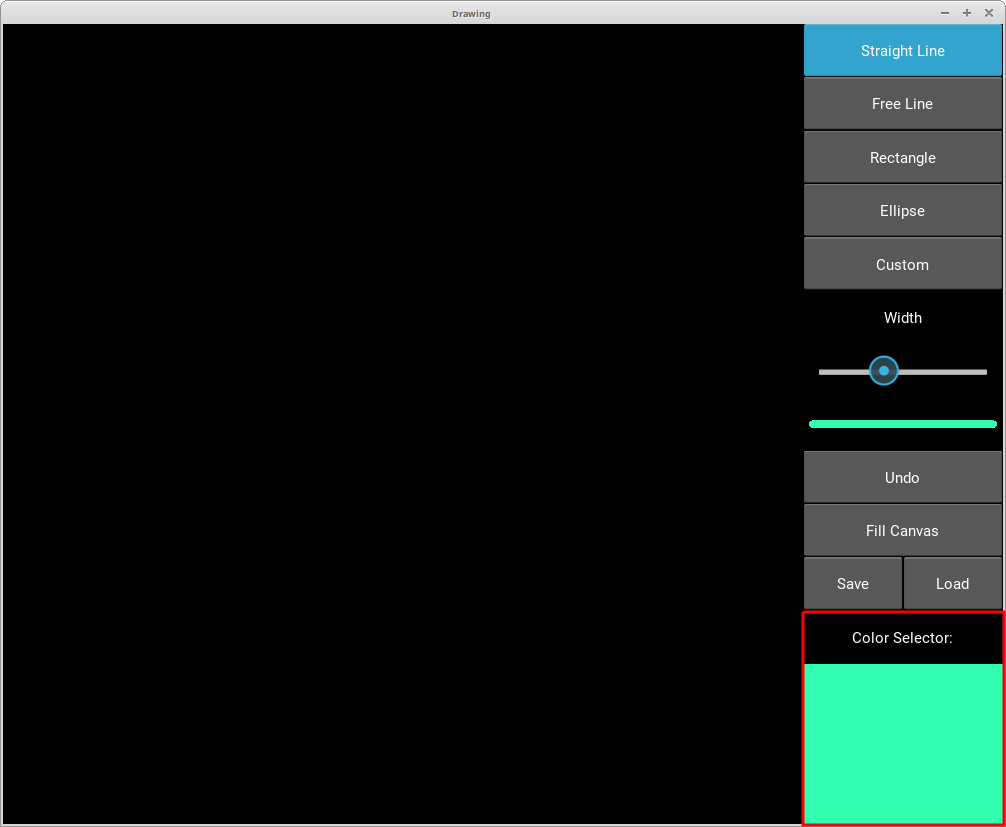

There are two portions to completing this, creating the square which displays the current color and uses user touch events to cause it to load the popup, and implenting the popup with the Kivy Color Selector widget.

## 4.1 The Color Example square with Touch Input

To implement this widget, we need to draw a rectangle, set the color to the same colour which is to be drawn, and check if the user is clicking on it. We can check if the user is clicking on it by registering a touch_down event, and seeing if the touch.x and touch.y are within the bounds of the rectangle. If they are, then open the color picker popup.

## 4.2 The Color Picker popup

The final portion of the Assignment is to create a pop-up window with the colour picker widget. 

Kivy has a native widget to allow selecting colors. It should be noted that this widget is experimental and the interface may be changed with new versions of the application. However, for the purpose of this assignment, it should be stable enough to allow us to utilize it in our application.

The documentation for the color picker can be found here: https://kivy.org/docs/api-kivy.uix.colorpicker.html

The widget is relatively easy to use, we simply need to add it to our form, and write our code in the on_color function. The following simply kivy application shows the usage of the color picker:

The ColorPicker widget's usage is demonstrated below.

Complete the example by setting the label to the color selected by the color picker.

A quick explanation of the ```*List``` operator: This notation is used in a function's parameter list when we want to take a composite data structure like a List or Tuple, unpack the values, and pass them into the function individually as arguments. That is, the following code blocks are equivalent:

```
myList = [1,2,3]
myFunction (myList[0], myList[1], myList[2])
```

```
myList = [1,2,3]
myFunction (*myList)
```

This second notation is more convenient for us, as the ColorPicker returns a list, and we may pass that list into the Color constructor to create a Color object instruction for drawing.

In [1]:
dotKV = '''\
<ColorExample>:
    orientation: "vertical"
    ColorPicker:
        on_color: root.setColour()
        id: clp
    Label:
        text: ""
        id: lbl
\
'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

from kivy.app import App
from kivy.graphics.vertex_instructions import Rectangle
from kivy.uix.boxlayout   import BoxLayout
from kivy.graphics import Color

class ColorExample(BoxLayout):
        
    def setColour(self):
        print (self.ids.clp.color)
        with self.ids.lbl.canvas:
            Color(*self.ids.clp.color) # modify me to work with the selected color
            self.rect = Rectangle(pos=self.ids.lbl.pos, size=self.ids.lbl.size)

class DrawingApp(App):
    def build(self):
        return ColorExample()

if __name__ == "__main__":
    DrawingApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\Quinn\.kivy\logs\kivy_18-03-09_113.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 - Build 22.20.16.4749'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 620'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 - Build 22.20.16.4749'>
[INFO   ] [GL          ] Texture max size <16384>

[1.0, 1, 1, 1]
[1.0, 1.0, 1.0, 1]
[0.3999999761581421, 1, 1, 1]
[0.396078431372549, 1.0, 1.0, 1.0]
[0.396078431372549, 1.0, 1.0, 1.0]
[0.396078431372549, 1.0, 1.0, 1.0]
[0.30000001192092896, 1, 1, 1.0]
[0.2980392156862745, 1.0, 1.0, 1.0]
[0.2980392156862745, 1.0, 1.0, 1.0]
[0.2980392156862745, 1.0, 1.0, 1.0]
[0.6499999761581421, 1, 1, 1.0]
[0.6499999761581421, 1, 0.6000000238418579, 1.0]
[0.6470588235294118, 1.0, 0.6, 1.0]
[0.6470588235294118, 1.0, 0.6, 1.0]
[0.6470588235294118, 1.0, 0.6, 1.0]
[0.949999988079071, 1, 0.6, 1.0]
[0.949999988079071, 1, 0.6000000238418579, 1.0]
[0.9490196078431372, 1.0, 0.6, 1.0]
[0.9490196078431372, 1.0, 0.6, 1.0]
[0.9490196078431372, 1.0, 0.6, 1.0]
[1.0, 1, 0.6, 1.0]
[1.0, 0.8999999761581421, 0.6, 1.0]
[1.0, 0.8999999761581421, 0.9750000238418579, 1.0]
[1.0, 0.8980392156862745, 0.9725490196078431, 1.0]
[1.0, 0.8980392156862745, 0.9725490196078431, 1.0]
[1.0, 0.8980392156862745, 0.9725490196078431, 1.0]


[INFO   ] [Base        ] Leaving application in progress...


Once you are comfortable using the Color Picker widget, replace the contents of a popup window with this widget. When a color is returned to the form, update the demonstration line, the color selector rectangle and the drawing color.

# Part 5: Putting it all together

We have covered quite a bit in this assignment. Putting it all together is not the easiest task.

Use the space below to bring together all of the bits of your program:

In [1]:
dotKV = '''\

<PaintWidget>:
    size_hint_x: 0.8

<MenuWidget>:
    size_hint_x: 0.2
    orientation: "vertical"
    # your code here. Most of your layout code should go here. #
    BoxLayout:
        orientation: "vertical"
        ToggleButton:
            allow_no_selection: False
            text : "Straight Line"
            group: "lineType"
            state: "down"
            on_press: if (self.state == "down"): root.setType(self.text)
        ToggleButton:
            allow_no_selection: False
            text : "Free Draw"
            group: "lineType"
            state: "normal"
            on_press: if (self.state == "down"): root.setType(self.text)
        ToggleButton:
            allow_no_selection: False
            text : "Rectangle"
            group: "lineType"
            state: "normal"
            on_press: if (self.state == "down"): root.setType(self.text)
        ToggleButton:
            allow_no_selection: False
            text : "Ellipse"
            group: "lineType"
            state: "normal"
            on_press: if (self.state == "down"): root.setType(self.text)
        ToggleButton:
            allow_no_selection: False
            text : "Air Brush"
            group: "lineType"
            state: "normal"
            on_press: if (self.state == "down"): root.setType(self.text)
    BoxLayout:
        orientation: "vertical"
        Label:
            text : "Width"
        Slider:
            min: 0.3
            max : 10
            step: 0.1
            id : "width"
            on_touch_move: root.setWidth(self.value)
            on_touch_up: root.setWidth(self.value)
        BoxLayout:
            Label:
                id: "preview"
                padding: (10, 5)
    BoxLayout:
        orientation: "vertical"
        Button:
            text : "Undo"
            on_press: if (self.state == "down"): root.undo()
        Button:
            text : "Fill Canvas"
            on_press: if (self.state == "down"): root.fill()
        Button:
            text : "Clear Canvas"
            on_press: if (self.state == "down"): root.clear()
        BoxLayout:
            orientation: "horizontal"
            Button:
                text : "Load"
                on_press: if (self.state == "down"): root.load()
            Button:
                text : "Save"
                on_press: if (self.state == "down"): root.save()
        BoxLayout:
            orientation: "horizontal"
            Button:
                background_normal: ''
                background_color: 1, 0, 0, 1
                id : colorPicker
                text : "Color"
                on_press: if (self.state == "down"): root.getColor()
                
<Loader>:
    BoxLayout:
        orientation: 'vertical'
        BoxLayout:
            Button:
                text: 'Select File'
                on_release: root.show_load()
        BoxLayout:
            TextInput:
                id: text_input
                text: ''

<LoadDialog>:
    BoxLayout:
        size: root.size
        pos: root.pos
        orientation: "vertical"
        FileChooserListView:
            id: filechooser
        BoxLayout:
            size_hint_y: None
            height: 30
            Button:
                text: "Cancel"
                on_release: root.cancel()

            Button:
                text: "Load Image"
                on_release: root.load(filechooser.path, filechooser.selection)
                
<SaveDialog>:
    BoxLayout:
        size: root.size
        pos: root.pos
        orientation: "vertical"
        FileChooserListView:
            id: filechooser
        BoxLayout:
            size_hint_y: None
            height: 30
            Button:
                text: "Cancel"
                on_release: root.cancel()

            Button:
                text: "Save Image"
                on_release: root.load(filechooser.path, filename.text)
            TextInput:
                id: filename
                text: "creation.png"
                
<ColorSelector>:
    orientation: "vertical"
    ColorPicker:
        id: clp
        size_hint_y: 0.8
    Button:
        text: "Confirm"
        on_release: root.select(clp.color)
        size_hint_y: 0.1
    Button:
        text: "Cancel"
        on_release: root.cancel()
        size_hint_y: 0.1
\
'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

from random import random

from kivy.app import App
from kivy.uix.label import Label
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.floatlayout import FloatLayout
from kivy.uix.togglebutton import ToggleButton
from kivy.uix.widget import Widget
from kivy.uix.button import Button
from kivy.properties import ObjectProperty
from kivy.uix.popup import Popup
from kivy.graphics import Color, Line, Rectangle, Ellipse

import os

# complete this dictionary to RGBA values from button color codes:
colorDict = { "R" : [1, 0, 0, 1], "Y": [1, 1, 0, 1], "G": [0, 1, 0, 1],
              "B" : [0, 0, 1, 1], "C": [0, 1, 1, 1], "M": [1, 0, 1, 1]}


class ColorSelector(BoxLayout):    
    select = ObjectProperty(None)        
    cancel = ObjectProperty(None)

class LoadDialog(FloatLayout):
    load = ObjectProperty(None)
    cancel = ObjectProperty(None)
    
class SaveDialog(FloatLayout):
    load = ObjectProperty(None)
    cancel = ObjectProperty(None)
    
class PaintWidget (Label):
    def __init__ (self):
        # you may optionally use these member values. I found them useful.
        Label.__init__(self)
        self.color = [1,0,0,1]          # color, in RGBA format    
        self.lineType = "Straight Line" # current line
        self.lineWidth = 1              # current line width
        self.touch_start = None         # starting point of the line
        self.touch_end = None           # ending point of a drawn line
    
    def on_touch_down(self, touch):
        color = self.color
        with self.canvas:
            Color(*color, mode='rgba')
            self.touch_start = [touch.x, touch.y]
            if(self.lineType == "Free Draw") or (self.lineType == "Straight Line"):
                line = Line()
                line.width = self.lineWidth
                line.points = self.touch_start + self.touch_start
                touch.ud['line'] = line
            elif(self.lineType == "Rectangle"):
                line = Rectangle()
                line.pos = (self.touch_start[0], self.touch_start[1])
                line.size = (0, 0)
                touch.ud['line'] = line
            elif(self.lineType == "Ellipse"):
                line = Ellipse()
                line.pos = (self.touch_start[0], self.touch_start[1])
                line.size = (0, 0)
                touch.ud['line'] = line
            elif(self.lineType == "Air Brush"):
                touch.ud['line'] = Ellipse(pos = (touch.x, touch.y), size = (self.lineWidth * 3, self.lineWidth * 3))
        pass

    def on_touch_up(self, touch):
        if('line' in touch.ud.keys()):
            if(self.lineType == "Rectangle") or (self.lineType == "Ellipse"):
                touch.ud['line'].size = (touch.x - self.touch_start[0], touch.y - self.touch_start[1])
            elif(self.lineType == "Air Brush"):
                pass
            else:
                touch.ud['line'].points += [touch.x, touch.y]
        
    def on_touch_move(self, touch):
        if('line' in touch.ud.keys()):
            if(self.lineType == "Free Draw"):
                touch.ud['line'].points += [touch.x, touch.y]
            elif(self.lineType == "Straight Line"):
                touch.ud['line'].points = [*self.touch_start, touch.x, touch.y]
            elif(self.lineType == "Rectangle") or (self.lineType == "Ellipse"):
                touch.ud['line'].size = (touch.x - self.touch_start[0], touch.y - self.touch_start[1])
            elif(self.lineType == "Air Brush"):
                from random import randint
                devx = randint(int(-self.lineWidth * 4), int(self.lineWidth * 4))
                devy = randint(int(-self.lineWidth * 4), int(self.lineWidth * 4))
                with self.canvas:
                    Ellipse(pos = (touch.x + devx, touch.y + devy), size = (self.lineWidth * 2, self.lineWidth * 2))
        
class MenuWidget(BoxLayout):
    
    def __init__ (self):
        BoxLayout.__init__(self)
        self.paintWidget = PaintWidget()
        with self.canvas:
            Color(*self.paintWidget.color, mode='rgba')
            self.preview = Line(points= [650, 250, 780, 250])
            self.preview.width = 1
    
    # call these functions from your menu buttons
    def setWidth (self, in_width):
        self.paintWidget.lineWidth = in_width
        self.preview.width = in_width
        
    def setType (self, in_type):
        self.paintWidget.lineType = in_type
        
    def setColor (self, color):
        self.paintWidget.color = color           
        self.ids.colorPicker.background_color = color
        with self.canvas:
            Color(*self.paintWidget.color, mode='rgba')
            self.preview = Line(points= [650, 250, 780, 250])
        self.dismiss_popup()
            
    def undo (self, *args):
        if(len(self.paintWidget.canvas.children) > 3):
            self.paintWidget.canvas.remove(self.paintWidget.canvas.children.pop())
            self.paintWidget.canvas.remove(self.paintWidget.canvas.children.pop())
            
    def fill(self):
        with self.paintWidget.canvas:
            Color(*self.paintWidget.color)
            Rectangle(pos = (0,0), size=(self.paintWidget.width, self.paintWidget.height))
    
    def clear(self):
        with self.paintWidget.canvas:
            Color([0, 0, 0, 1])
            Rectangle(pos = (0,0), size=(self.paintWidget.width, self.paintWidget.height))
                    
    def dismiss_popup(self):
        self._popup.dismiss()

    def load(self):
        content = LoadDialog(load=self.openFile, cancel=self.dismiss_popup)
        self._popup = Popup(title="Load file", content=content, size_hint=(0.9, 0.9))
        self._popup.open()
        
    def save(self):
        content = SaveDialog(load=self.saveFile, cancel=self.dismiss_popup)
        self._popup = Popup(title="Save file", content=content, size_hint=(0.9, 0.9))
        self._popup.open()
        
    def openFile(self, path, filename):
        with self.paintWidget.canvas:
            Color(1, 1, 1, 1)
            Rectangle(pos = (0,0), size=(self.paintWidget.width, self.paintWidget.height), source=os.path.join(path, filename[0]))
        self.dismiss_popup()
        
    def saveFile(self, path, filename):
        self.paintWidget.export_to_png(os.path.join(path, filename))
        self.dismiss_popup()
        
    def getColor(self):
        content = ColorSelector(select = self.setColor, cancel=self.dismiss_popup)
        self._popup = Popup(title="Choose Color", content=content, size_hint=(0.9, 0.9))
        self._popup.open()
        
    
# this will build your app.        
class DrawingApp(App):
    def build(self):
        parent = BoxLayout()
        MW = MenuWidget ()
        parent.add_widget (MW.paintWidget)
        parent.add_widget (MW)
        return parent

if __name__ == "__main__":
    DrawingApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\Quinn\.kivy\logs\kivy_18-03-09_1.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded


Purge log fired. Analysing...
Purge 26 log files
Skipped file C:\Users\Quinn\.kivy\logs\kivy_18-03-09_0.txt, [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Quinn\\.kivy\\logs\\kivy_18-03-09_0.txt'
Purge finished!


[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 - Build 22.20.16.4749'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 620'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 - Build 22.20.16.4749'>
[INFO   ] [GL          ] Texture max size <16384>
[INFO   ] [GL          ] Texture max units <32>
[INFO   ] [Shader      ] fragment shader: <b"WARNING: 0:4: '' :  #version directive missing">
[INFO   ] [Shader      ] vertex shader: <b"WARNING: 0:4: '' :  #version directive missing">

Congratulations! You now have now completed a lightweight drawing application. If you wish, you may further extend this application as your term project. Some possible next steps, with some design suggestions, include:
- Implementing a zoom function - instead of saving your instructions as absolute values, save them as relative values and resize the base widget. This is non-trivial.
- Implementing a playback feature - allow each stroke to be displayed in order over time. Change the data structure for your draw functions and draw them one by one invoked through a clock event.
- Allow changing the canvas size for drawing, 
- Eyedropper widget 
- More brushes
- Check out the FOSS Drawing Application Krita for more inspiration to see if there is anything you would like to incorporate into your application